In [8]:
# !pip install tensorflow==1.12.0

In [9]:
import tensorflow as tf
from matplotlib.pylab import plt
%matplotlib inline

In [16]:
tf.random.set_random_seed(2121)
x = tf.random_uniform((100,1),0,1)
tf.random.set_random_seed(2122)
y = x*2.4+5+tf.random_normal((100,1),0,0.2)

In [17]:
a = tf.get_variable(name="weight", shape=[1]) 
b = tf.get_variable(name="bias", shape=[1]) 

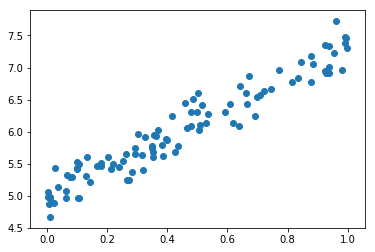

In [18]:
with tf.Session() as sess:
    x_numpy,y_numpy = sess.run([x,y])
    plt.scatter(x_numpy,y_numpy)

In [19]:
y_ = a*x+b

In [20]:
loss = tf.losses.mean_squared_error(y,y_)

In [21]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(100):
        sess.run(optimizer)
        if epoch%25==0:
            print(sess.run(loss))
    y_preds,x_preds = sess.run([y_,x])

10.50706
0.07719231
0.063236915
0.0592545


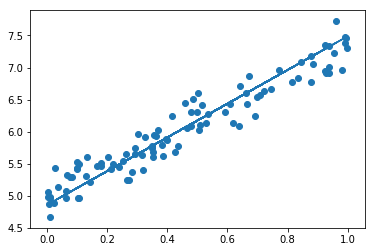

In [23]:
plt.scatter(x_numpy,y_numpy)
plt.plot(x_preds,y_preds)

In [24]:
# _____restart! 

In [1]:
import tensorflow as tf
from matplotlib.pylab import plt
%matplotlib inline

/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.enable_eager_execution()

In [3]:
tf.random.set_random_seed(2121)
x = tf.random_uniform((100,1),0,1)
tf.random.set_random_seed(2122)
y = x*2.4+5+tf.random_normal((100,1),0,0.2)

In [4]:
a = tf.get_variable(name="weight", shape=[1],trainable=True) 
b = tf.get_variable(name="bias", shape=[1],trainable=True) 

In [5]:
def lin_model(x):
    y_ = a*x+b
    return y_

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [7]:
for epoch in range(600):
    with tf.GradientTape() as tape:
        loss = tf.losses.mean_squared_error(y,lin_model(x))
        grads = tape.gradient(loss, [a,b])
        grads_and_vars = zip(grads, [a,b])
        optimizer.apply_gradients(grads_and_vars) 
    if epoch%25==0:    
        print(loss.numpy())

30.267118
0.17270982
0.11336814
0.08026631
0.061798397
0.051494937
0.045746498
0.042539373
0.040750094
0.039751813
0.039194874
0.038884167
0.038710788
0.038614072
0.03856011
0.03853001
0.03851322
0.038503837
0.038498603
0.038495705
0.038494065
0.038493164
0.03849265
0.038492363


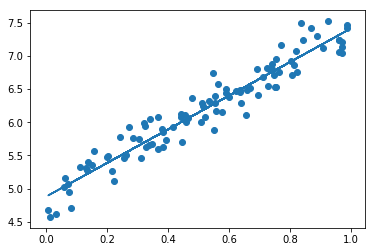

In [8]:
plt.scatter(x,y)
plt.plot(x.numpy(),lin_model(x).numpy())